In [54]:
import pandas as pd
from collections import Counter
import itertools
import numpy as np
import matplotlib.pyplot as plt
import json

from functional import get_data, process, clean_df, add_counts, analyze_most_different 

## how gender clues are implied within the contents recommended by Spotify’s recommender systems in terms of the graphical user interface, and the presentation of playlists on the home screen, based on personalized recommendation patterns
</br>

### How are gender ideologies implied within the recommended playlists and their organization on Spotify

### Preparation:
Reading files</br>
Cleaning data

In [338]:
full_male, full_female = get_data()

# Creating subsets from the data to work with
male, female = process(full_male), process(full_female)

# Clean all data by removing trailing whitespaces and lowercasing all letters
female = add_counts(clean_df(female.copy()))
male = add_counts(clean_df(male.copy()))

len(male), len(female)
male = male[male['type'] == 'playlist']
female = female[female['type'] == 'playlist']

Now that data is clean, textual analysis can begin

### Simple stats, which are the most common playlists each user received?

In [339]:
len(male[['playlist name', 'playlist count']].drop_duplicates().sort_values(by='playlist count', ascending=False))

347

238
3752


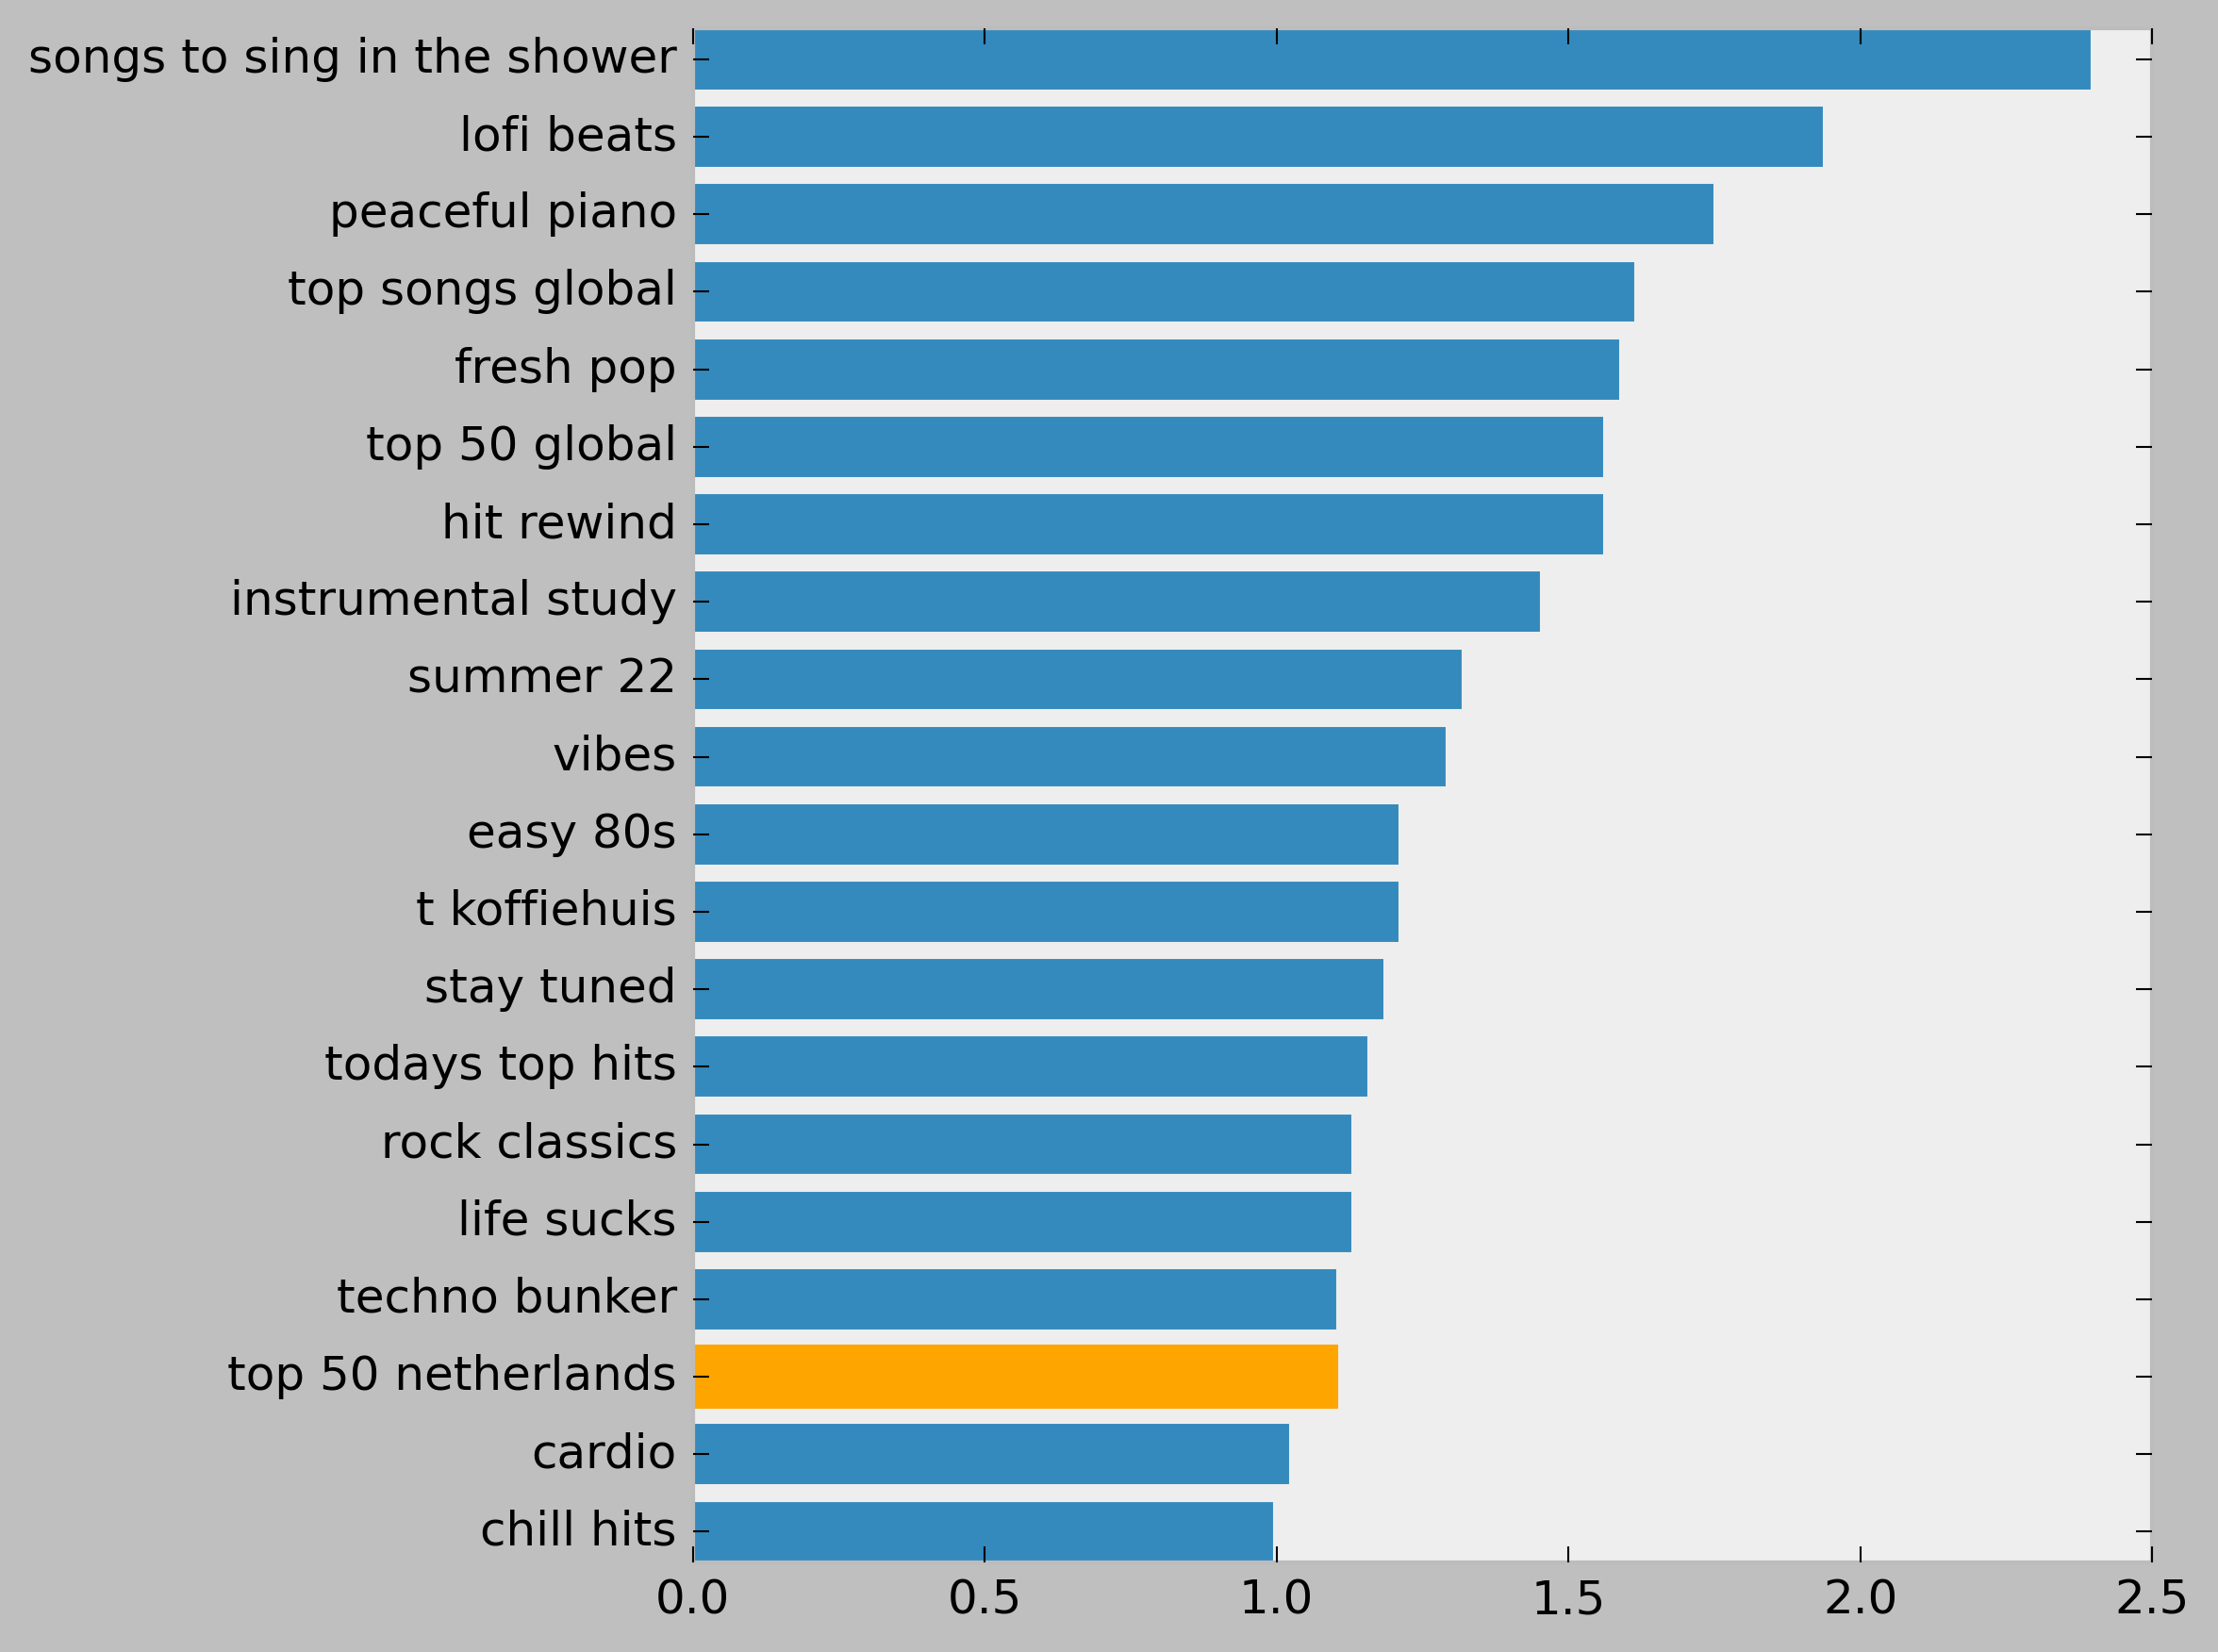

In [340]:
plotdf = female[female['type'] == 'playlist']
plotdf= plotdf[['playlist name', 'playlist count']].drop_duplicates().sort_values(by='playlist count', ascending=False)#.head(20)

print(len(plotdf))
print(sum(plotdf['playlist count']))
plotdf=plotdf.head(20)

plt.figure(dpi=300)
bar = plt.barh(plotdf['playlist name'], (plotdf['playlist count']/len(female))*100)
bar[-3].set_color('orange')
plt.gca().invert_yaxis()
plt.grid()
plt.tight_layout()
plt.savefig('data/femaletop20.png')
plt.show()

347
3413


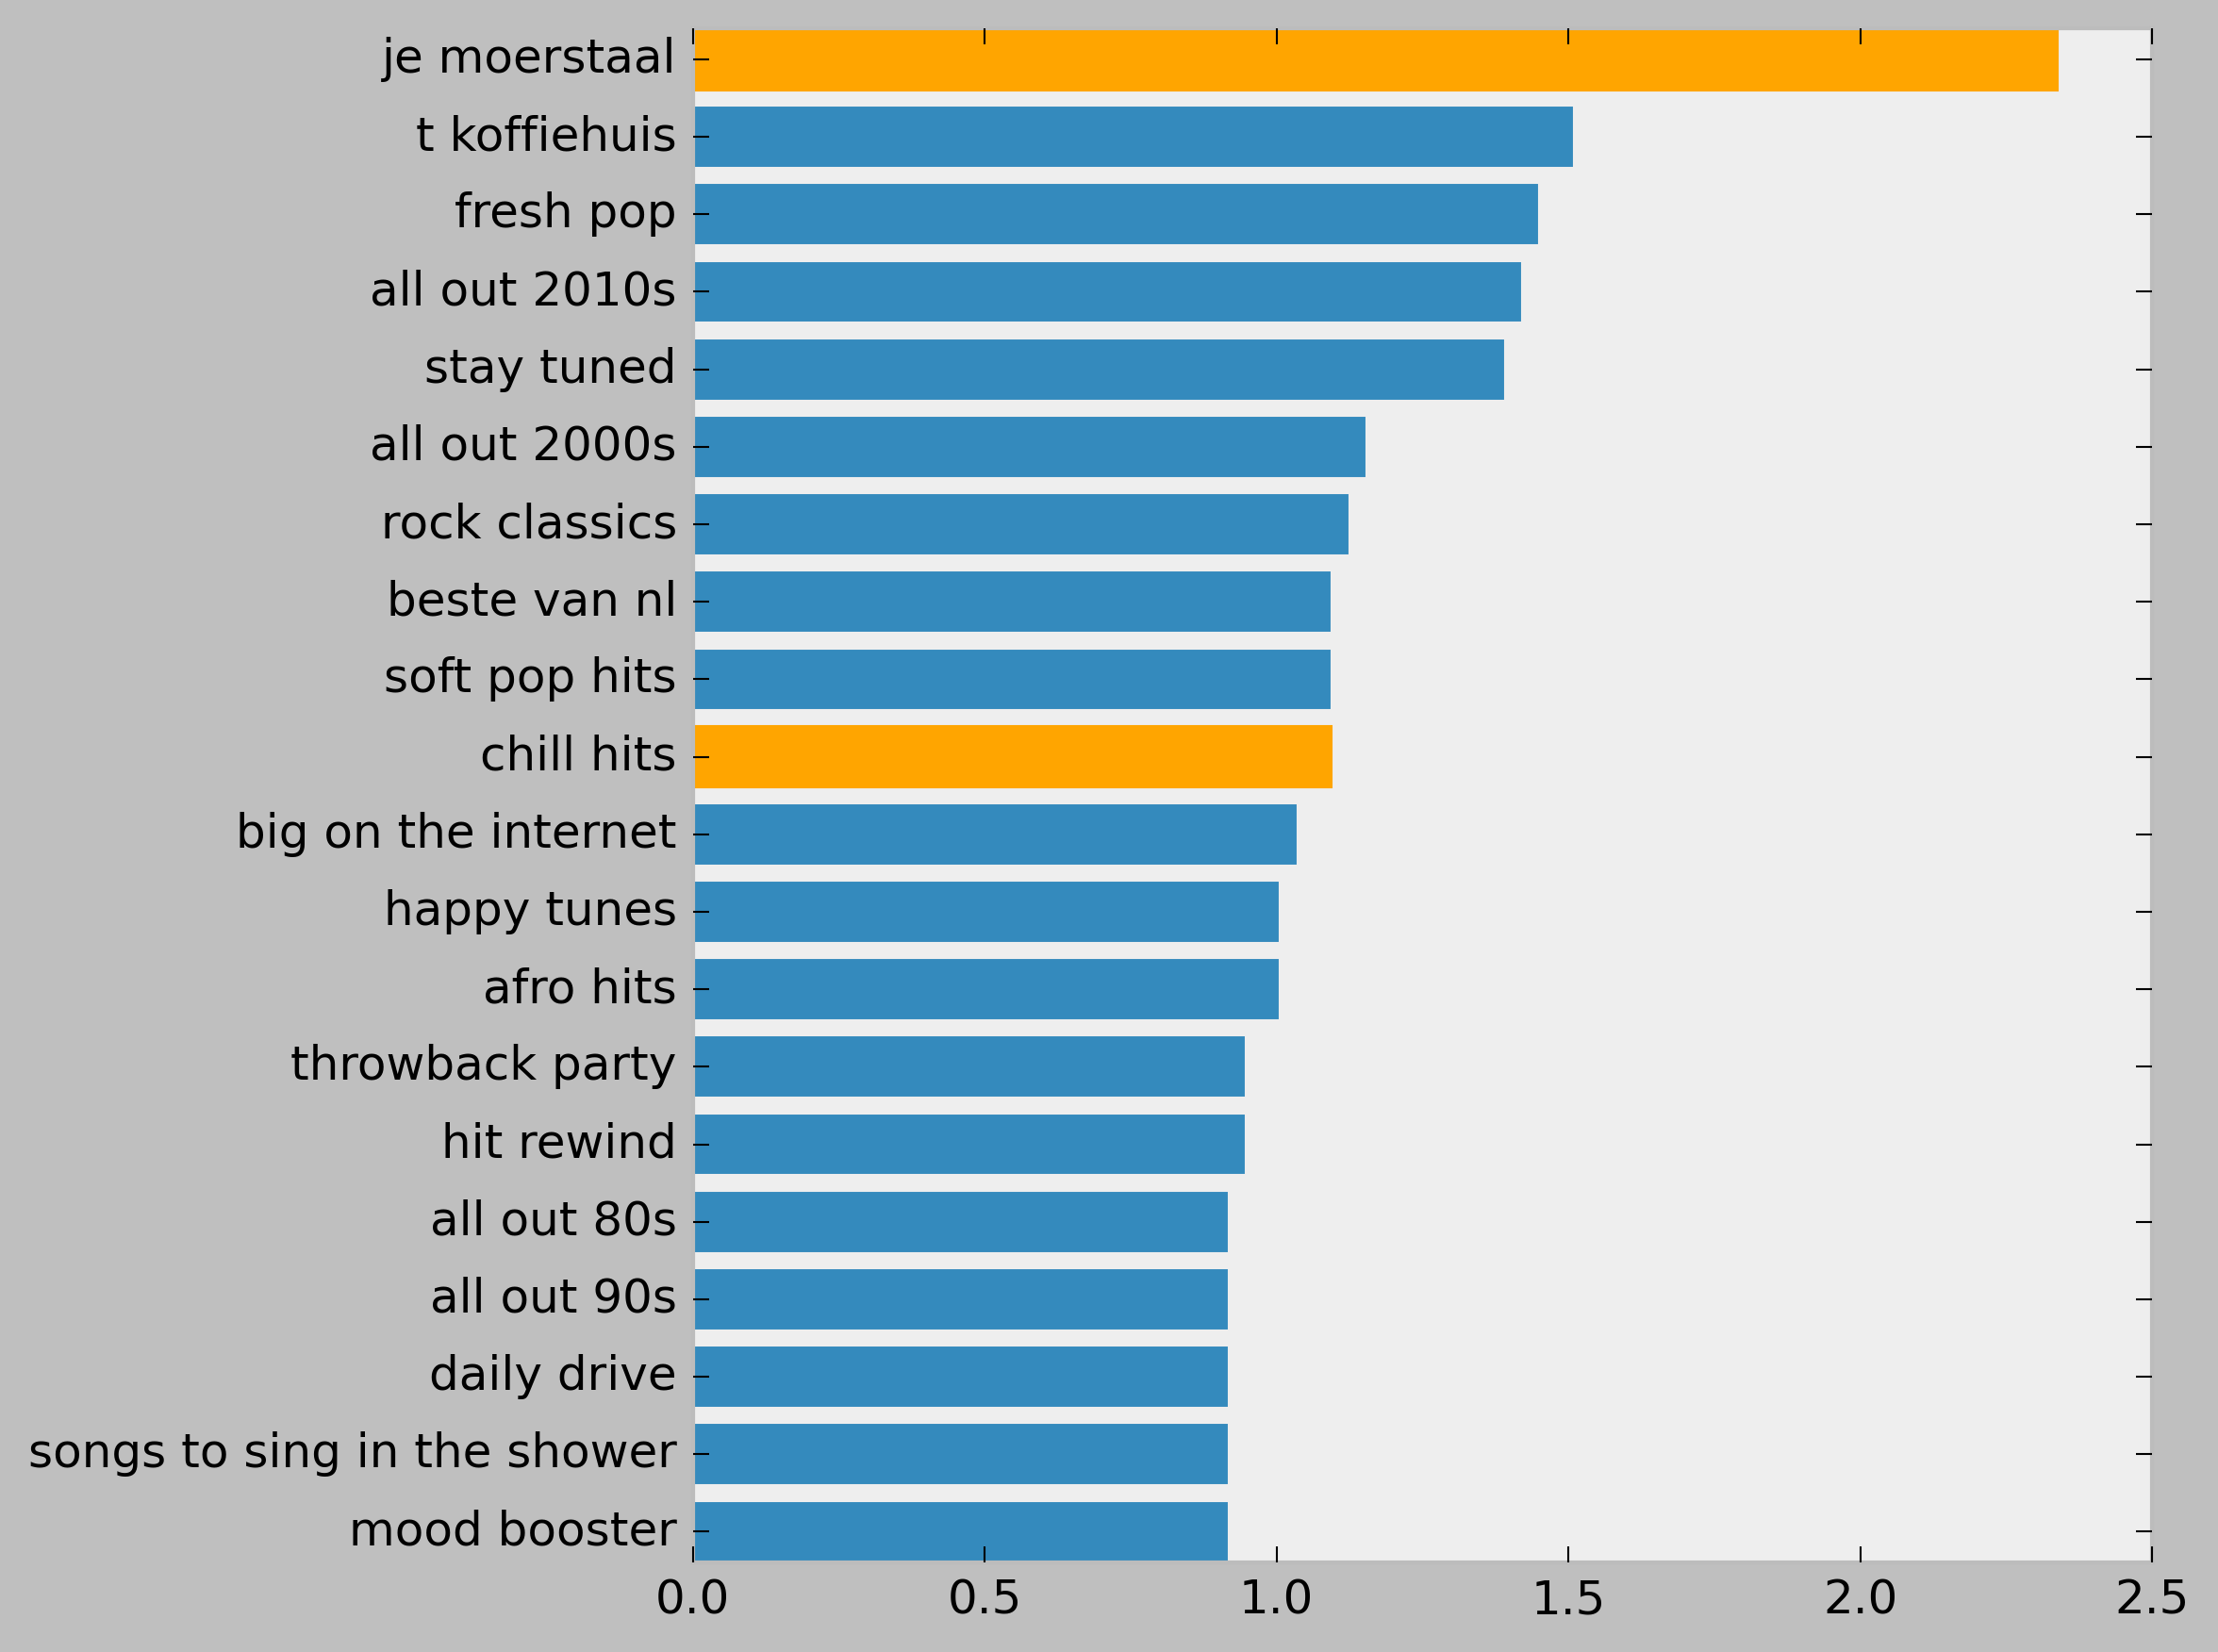

In [341]:
plotdf = male[male['type'] == 'playlist']
plotdf= plotdf[['playlist name', 'playlist count']].drop_duplicates().sort_values(by='playlist count', ascending=False)
print(len(plotdf))
print(sum(plotdf['playlist count']))
plotdf = plotdf.head(20)

plt.figure(dpi=300)
bar = plt.barh(plotdf['playlist name'], (plotdf['playlist count']/len(male))*100)
bar[0].set_color('orange')
bar[9].set_color('orange')
plt.gca().invert_yaxis()
plt.grid()
plt.tight_layout()

plt.savefig('data/maletop20.png')

plt.show()

### Dutch Playlists

In [6]:
dutchm = ['je moerstaal', 'beste van nl', 'woordenschat', 'made in nl', 'beste van woordenschat', '80s beste nltalig', '60s beste nltalig', '70s beste nltalig', 'de jeugd', '00s beste nltalig', '90s beste nltalig', 'de hits uit 2016', 'top 50 netherlands', 'de hits uit 2010', 'de hits uit 2012', 'de hits uit 2019', 'de hits uit 2014', '10s beste nltalig', 'karakter', 'new music friday nl', '10s allerbeste', 'de hits uit 2017', 'equal netherlands', 'de hits uit 2015', 'de hits uit 2013', 'viral 50 netherlands', 'top songs netherlands']
dutchf = ['top songs netherlands', 'top 50 netherlands', 'beste van nl', 'viral 50 netherlands', 'je moerstaal', 'viral hits nl', 'new music friday nl', 'hot hits nl', 'woordenschat', 'zomerhits 20102020', '10s allerbeste', 'de hits uit 2016', 'de hits uit 2019', 'beste van woordenschat', '10s beste nltalig', 'de hits uit 2018']


femc=0
for x in dutchf:
    femc += int(female['playlist count'].loc[female['playlist name'] == x].unique())

mamc=0
for y in dutchm:
    #display(male.loc[male['playlist name'] == y].drop_duplicates())
    mamc += int(male['playlist count'].loc[male['playlist name'] == y].unique())

# Amount of dutch playlists recommended out of all playlists ever recommended
(mamc/len(male.loc[male['type']=='playlist']))*100, (femc/len(female.loc[female['type']=='playlist']))*100


(7.812962414915655, 8.909825033647376)

In [7]:
# Amount of dutch playlists out of all playlists
(len(dutchm)/len(male['playlist name'].loc[male['type']=='playlist'].unique()))*100, (len(dutchf)/len(female['playlist name'].loc[female['type']=='playlist'].unique()))*100

(7.780979827089338, 6.722689075630252)

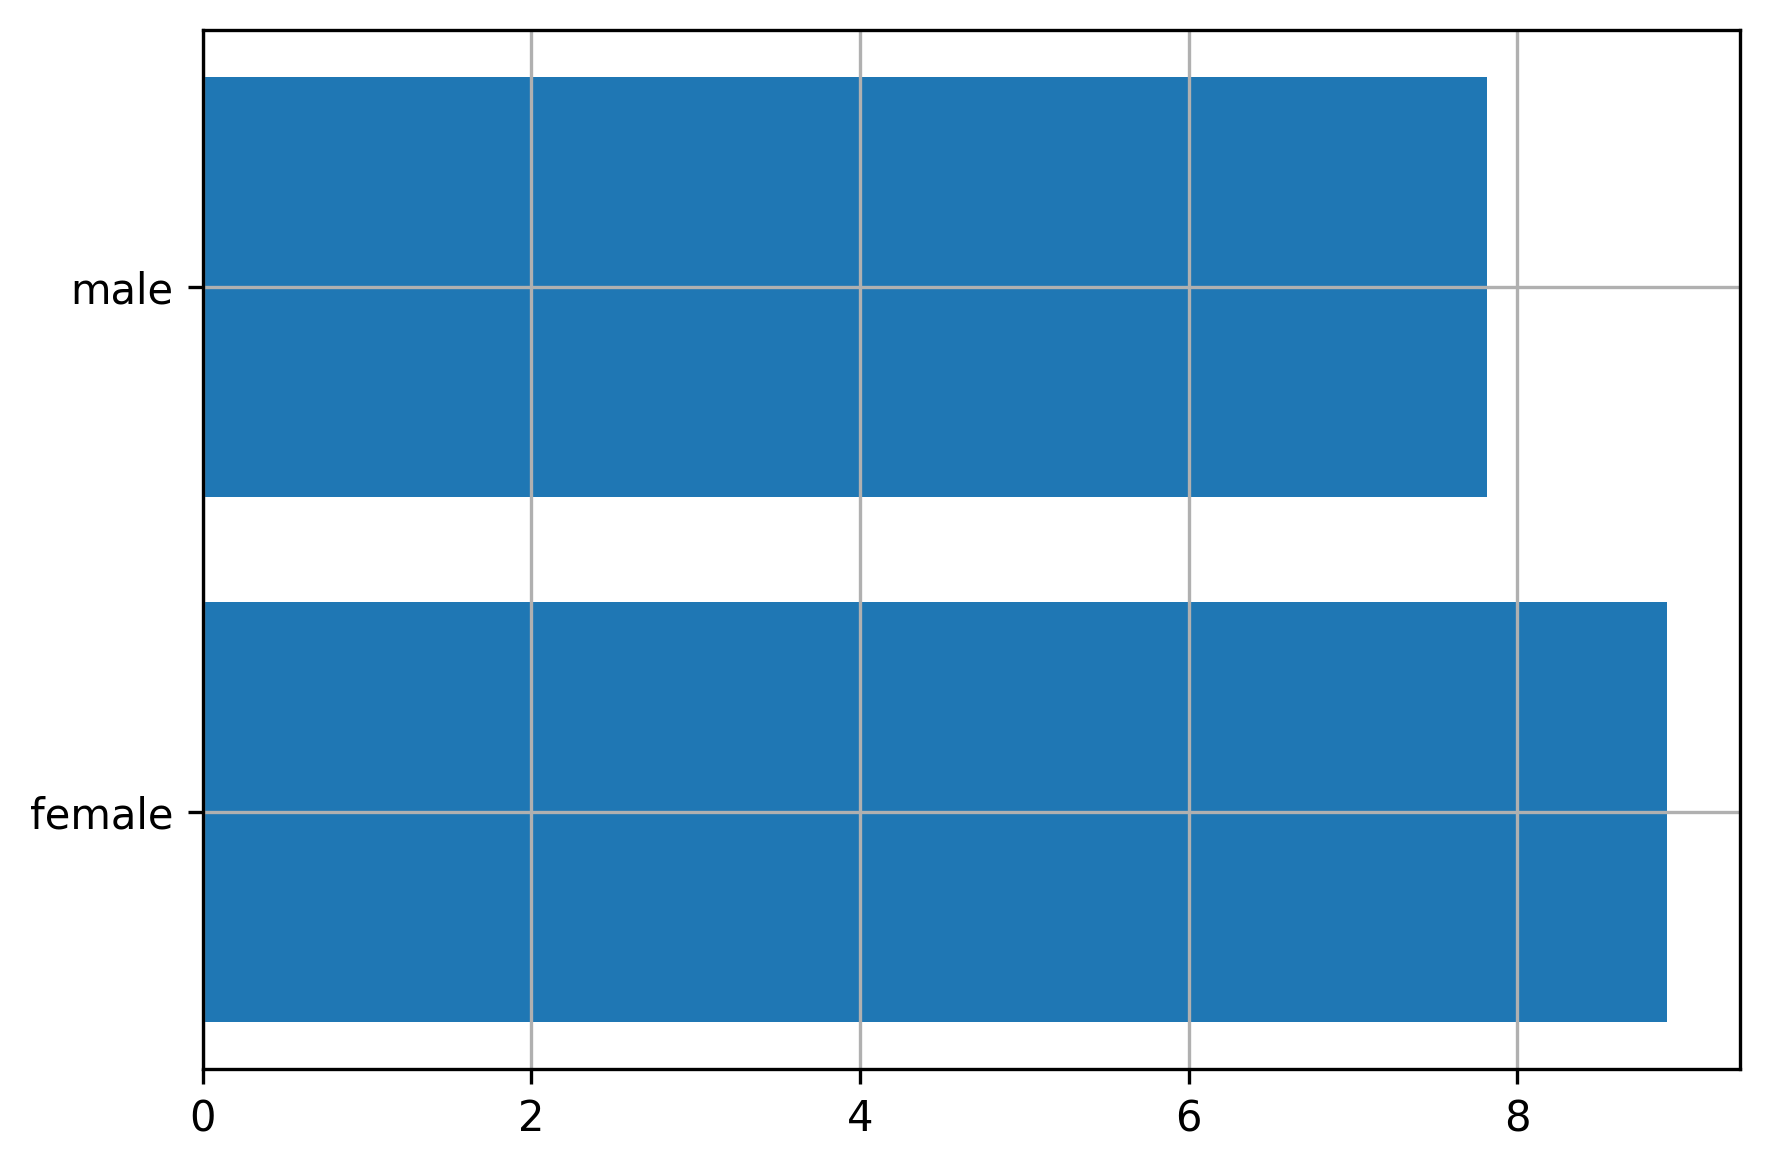

In [9]:
# Dutch playlist count
mf = [(mamc/len(male))*100, (femc/len(female))*100]

plt.figure(dpi=300)
plt.barh(['male', 'female'], mf)
plt.gca().invert_yaxis()
plt.grid()
plt.tight_layout()

plt.savefig('data/maletop20.png')

plt.show()

### Similarities:
Find which playlists both users got recommended

In [10]:
# Check which playlists both users have in common
similar_playlists = male[male['playlist name'].isin(female['playlist name'])]
similar_playlists = similar_playlists[similar_playlists.type == 'playlist']
#similar_playlists

In [11]:
# Which playlists only one of both users gets recommended to
diff = pd.concat([male[~male['playlist name'].isin(female['playlist name'])], 
    female[~female['playlist name'].isin(male['playlist name'])]])
diff = diff[diff.type == 'playlist']

### Finding which are the most appearing playlists only one of both users were recommended

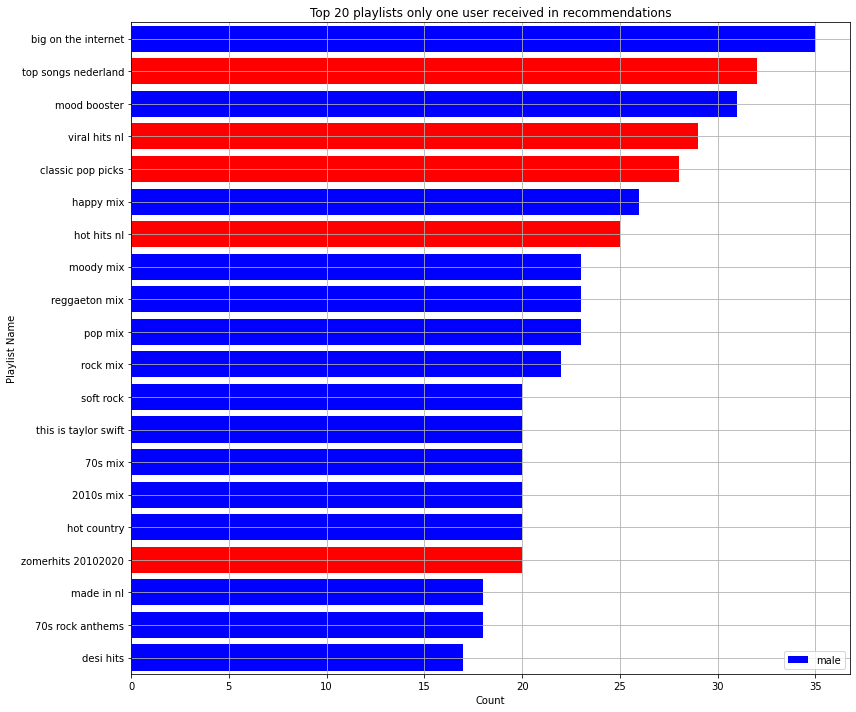

In [12]:
most_different = dict(Counter(diff['playlist name']).most_common(20))
male_unique = male['playlist name'].unique()

analyze_most_different(most_different, male_unique, feature=False)

In [15]:
# Looking for the most common recommended playlists per user
m = dict(Counter(male['playlist name']).most_common())
mdf = pd.DataFrame({'male': m.keys(), 'count': (v/len(male)*100 for v in m.values())})

f = dict(Counter(female['playlist name']).most_common())
fdf = pd.DataFrame({'female': f.keys(), 'count': (v/len(female)*100 for v in f.values())})

display(mdf.head(), fdf.head())

,male,count
0,je moerstaal,2.337970
1,t koffiehuis,1.509322
2,fresh pop,1.450133
3,all out 2010s,1.420539
4,stay tuned,1.390944


,female,count
0,songs to sing in the shower,2.395693
1,lofi beats,1.938089
2,peaceful piano,1.749664
3,top songs global,1.615074
4,fresh pop,1.588156


### Looking for the difference between how often male vs female user received certain playlists

In [18]:
most_common_playlists = {
    'male': dict(Counter(male['playlist name']).most_common()), 
    'female': dict(Counter(female['playlist name']).most_common())
}

# Fill all playlists only one user gets recommended
new = pd.DataFrame(most_common_playlists).fillna(0)

# Get difference
new['diff'] = abs(new['male'] - new['female'])

# Sort
new.sort_values(by = 'diff', ascending=False, inplace=True)
new.head()

,male,female,diff
lofi beats,11.0,72.0,61.0
songs to sing in the shower,30.0,89.0,59.0
top songs global,2.0,60.0,58.0
top 50 global,2.0,58.0,56.0
peaceful piano,11.0,65.0,54.0


### Differences in playlist recommendations between both users

In [127]:
# Looking for top playlists both users were recommended that the other user was not
male_count = dict(Counter(m_playlist['playlist name'][~m_playlist['playlist name'].isin(f_playlist['playlist name'])]).most_common())
female_count = dict(Counter(f_playlist['playlist name'][~f_playlist['playlist name'].isin(m_playlist['playlist name'])]).most_common())

display(
pd.DataFrame({'male': male_count.keys(), 'count' : male_count.values()}).head(20),
pd.DataFrame({'female': female_count.keys(), 'count' : female_count.values()}).head(20)
)

,male,count
0,big on the internet,35
1,mood booster,31
2,happy mix,26
3,moody mix,23
4,reggaeton mix,23
5,pop mix,23
6,rock mix,22
7,soft rock,20
8,this is taylor swift,20
9,70s mix,20


,female,count
0,top songs nederland,32
1,viral hits nl,29
2,classic pop picks,28
3,hot hits nl,25
4,zomerhits 20102020,20
5,homework motivation,15
6,singled out,15
7,all new all now,15
8,sing along kpop,14
9,top hits of 2018,14


Tagging times after morning, afternoon and evening

In [ ]:
# Counting workout playlists
display(pd.DataFrame(Counter(female['playlist name'][female['hub name'] == 'workout']).most_common()))
display(pd.DataFrame(Counter(male['playlist name'][male['hub name'] == 'workout']).most_common()))

In [ ]:
print(dict(Counter(male['playlist name'][male['hub name'] == 'mood']).most_common()).keys(),'\n',
dict(Counter(female['playlist name'][female['hub name'] == 'mood']).most_common()).keys())

Differences between how often female vs male received lo-fi beats and life sucks

In [ ]:
print(len(male[male['playlist name'] =='life sucks']), len(female[female['playlist name'] =='life sucks']))
print(len(male[male['playlist name'] =='lofi beats']), len(female[female['playlist name'] =='lofi beats']))

Checking for hub names hinting towards sentiment playlists, ignoring 'more like' or similar playlists as they are targeted towards music discovery for artists, similar playlists or algorithmically generated, sentiment neutral playlists

In [ ]:
female_hubs = list(f_playlist['hub name'])
female_hubs = [e for e in female_hubs if not e.startswith('more like') and not e.startswith('recommended')]
set(female_hubs)

In [ ]:
male_hubs = list(m_playlist['hub name'])
male_hubs = [e for e in male_hubs 
if not e.startswith('more') and 
not e.startswith('recommended') and 
not e.startswith('for fans') and 
not e.startswith('discover') and
not e.endswith('name') and
not e.endswith('albums') and
not e.endswith('charts') and
not e.endswith('artists') and

# no personalized playlists
'you' not in e]

Counter(male_hubs).most_common()

Activity or mood related playlists extracted from here are
'chill,', 'dinner,', 'instrumental,', 'mood,', 'party,', 'singalong,', 'throwback,', 'workout'

In [ ]:
# looking for mood playlists
Counter(f_playlist['playlist name'][f_playlist['hub name'].isin(['mood','vibes'])]).most_common()

Checking how often the user was recommended certain mood playlists

In [ ]:
f_playlist['day'][f_playlist['playlist name'] == 'life sucks']
set(f_playlist['day'][f_playlist['playlist name'] == 'songs to sing in the shower'])

In [ ]:
# Male mood playlists
Counter(male['playlist name'][male['hub name'].isin(['mood','vibes','sad songs','sad vibes','happy'])]).most_common()

### Workout playlists

In [76]:
pd.DataFrame(Counter(male['playlist name'][male['hub name'].isin(['workout'])]).most_common())

,0,1
0,motivation mix,10
1,fun run,10
2,power hour,10
3,run this town,10
4,top hits workout,9
5,beast mode,9
6,power workout,9
7,cardio,9
8,workout,8
9,fast pop run,6


In [77]:
pd.DataFrame(Counter(female['playlist name'][female['hub name'].isin(['workout'])]).most_common())

,0,1
0,power hour,32
1,top hits workout,31
2,beast mode,31
3,fun run,31
4,motivation mix,31
5,workout,31
6,cardio,31
7,run this town,31
8,power workout,29
9,yoga meditation,15


# Hubs

In [342]:
female_hubs = female[['day', 'time', 'hub name']]
female_hubs = female_hubs.drop_duplicates()
female_hubs = female_hubs.reset_index().drop('index', axis=1)
female_hubs['hub count'] = female_hubs.groupby('hub name')['hub name'].transform('count')
female_hubs['hub percent'] = pd.to_numeric((female_hubs['hub count']/len(female_hubs))*100)

In [343]:
with open('hub_category.json', 'r') as f:
    file = json.load(f)

other = set(file['other'])
moods = set(file['moods_and_activities'])
genres = set(file['genres'])
for_you = set(file['for_you'])
trends = set(file['trends'])
more_like_playlists = set(file['more_like_playlists'])
more_like_artists = set(file['more_like_artists'])
recommended = set(file['recommended'])

hub_labels = ['trends','moods and activities','genres','more like artists','more like playlists','recommended','for you','other']

hub_colors = ['C0','C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']

In [344]:
# Create tags for female

conditions=[
    (female['hub name'].isin(trends)),
    (female['hub name'].isin(moods)),
    (female['hub name'].isin(genres)),
    (female['hub name'].isin(more_like_artists)),
    (female['hub name'].isin(more_like_playlists)),
    (female['hub name'].isin(recommended)),
    (female['hub name'].isin(for_you)),
    (female['hub name'].isin(other))
]

female['hub_category'] = np.select(conditions, hub_labels)

In [345]:
# Create tags for male

conditions=[
    (male['hub name'].isin(trends)),
    (male['hub name'].isin(moods)),
    (male['hub name'].isin(genres)),
    (male['hub name'].isin(more_like_artists)),
    (male['hub name'].isin(more_like_playlists)),
    (male['hub name'].isin(recommended)),
    (male['hub name'].isin(for_you)),
    (male['hub name'].isin(other))
]

male['hub_category'] = np.select(conditions, hub_labels)

In [346]:
female.groupby('hub_category')['hub_category'].count()
male.groupby('hub_category')['hub_category'].count()

hub_category
for you                 765
genres                  630
moods and activities    969
more like artists       408
other                    22
recommended              89
trends                  496
Name: hub_category, dtype: int64

In [347]:
# TODO: Find a way to connect the labels to specific colors
##c95efb
colors = ['#069af3','#5edc1f','yellow','orange','violet','brown','red','grey']

def my_autopct(pct):
    return ('%1.1f%%' % pct) if pct > 0.1 else ''


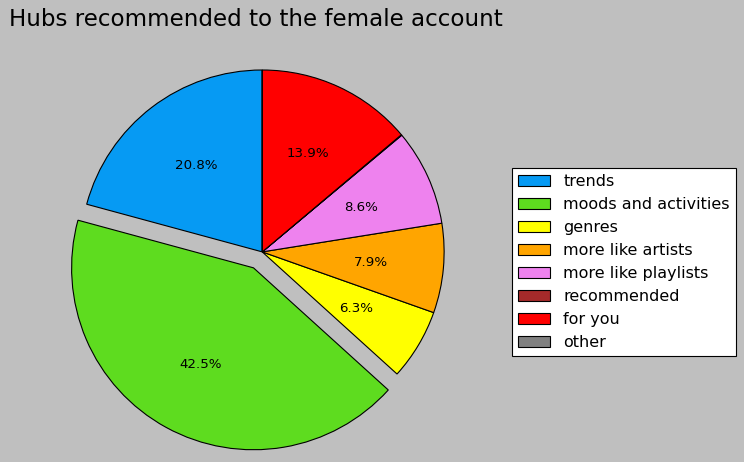

In [351]:
plt.style.use('classic')

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
cats = female.groupby('hub_category')['hub_category'].count()
cats_labels = list(cats.keys())
labels = hub_labels
sizes = [cats[cats_labels.index(v)] if v in cats_labels else 0 for v in hub_labels]
explode = [0.1 if m == max(sizes) else 0 for m in sizes]

fig1, ax1 = plt.subplots()
ax1.set_title('Hubs recommended to the female account', loc='center', size='xx-large', pad=40)
wedges, texts, autotexts = ax1.pie(sizes, autopct=my_autopct, startangle=90, textprops={'color':"black"}, explode=explode, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

leg = ax1.legend(wedges, labels,
          loc="center left",
          bbox_to_anchor=(1, 0, 0, 1), labelcolor='k')

plt.savefig('data/female_hub.png', dpi=300, facecolor=ax1.get_facecolor(), bbox_inches="tight")
plt.show()

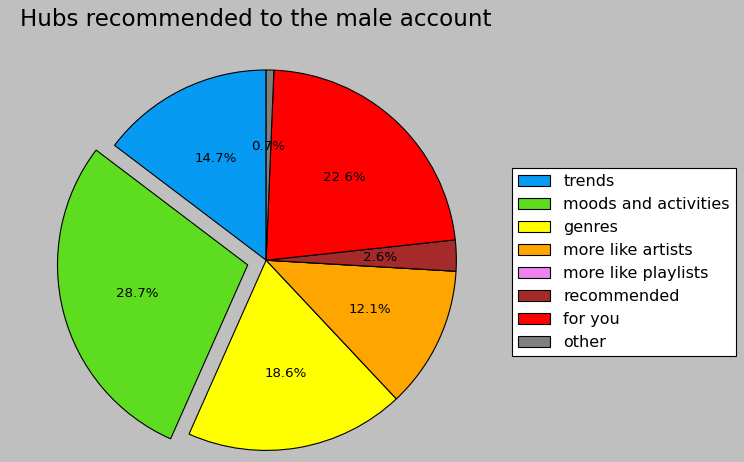

In [352]:
plt.style.use('classic')

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
cats = male.groupby('hub_category')['hub_category'].count()
cats_labels = list(cats.keys())
labels = hub_labels
sizes = [cats[cats_labels.index(v)] if v in cats_labels else 0 for v in hub_labels]
explode = [0.1 if m == max(sizes) else 0 for m in sizes]

fig1, ax1 = plt.subplots()
ax1.set_title('Hubs recommended to the male account', loc='center', size='xx-large', pad=40)
wedges, texts, autotexts = ax1.pie(sizes, autopct=my_autopct, startangle=90, textprops={'color':"black"}, explode=explode, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

leg = ax1.legend(wedges, labels,
          loc="center left",
          bbox_to_anchor=(1, 0, 0, 1), labelcolor='k')

plt.savefig('data/male_hub.png', dpi=300, facecolor=ax1.get_facecolor(), bbox_inches="tight")
plt.show()

In [65]:
# hub_values = ['trends','moods and activities','genres','more like artists','more like playlists','recommended','for you','other']
# sizes_m = male[['hub_category']]
# sizes_m['count'] = sizes_m.groupby('hub_category')['hub_category'].transform('count')#.to_list()
# #sizes_m = [v for v in sizes_m ]
# #sizes_f = female.groupby('hub_category')['hub_category'].count()#.to_list()

# test = pd.DataFrame.from_dict({'hub category':'more like playlists', 'count':0})
# print(test)


How many hubs did they receive?

In [353]:
male_hubs = male[['day', 'time', 'hub name']]

# Drop amount of times each hub has been recommended and instead calculate each hub's appearance once per daytime it appears
male_hubs = male_hubs.drop_duplicates()
male_hubs = male_hubs.reset_index().drop('index', axis=1)
male_hubs['hub count'] = male_hubs.groupby('hub name')['hub name'].transform('count')
male_hubs['hub percent'] = pd.to_numeric((male_hubs['hub count']/len(male_hubs))*100)

# Categorization of playlists

In [355]:
# Reading the categories and creating variables from it
with open('category.json', 'r') as f:
    test = json.load(f)

global_trends = set(test['global_trends'])
local_trends = set(test['local_trends'])
genres = set(test['genres'])
moods = set(test['moods'])
artists = set(test['artists'])
for_you = set(test['for_you'])
other = set(test['other'])

values = ['global trends', 'local trends', 'genres', 'moods and activities','artists and songs','for you','other']

Below I create the tagging; those functions are key

In [356]:
# Creating category in female df
#female['category'] = pd.Series(dtype='str')
conditions=[
    (female['playlist name'].isin(global_trends)),
    (female['playlist name'].isin(local_trends)),
    (female['playlist name'].isin(genres)),
    (female['playlist name'].isin(moods)),
    (female['playlist name'].isin(artists)),
    (female['playlist name'].isin(for_you)),
    (female['playlist name'].isin(other))
    ]

female['category'] = np.select(conditions, values)


In [357]:
# Creating category in male df
conditions=[
    (male['playlist name'].isin(global_trends)),
    (male['playlist name'].isin(local_trends)),
    (male['playlist name'].isin(genres)),
    (male['playlist name'].isin(moods)),
    (male['playlist name'].isin(artists)),
    (male['playlist name'].isin(for_you)),
    (male['playlist name'].isin(other))
    ]

male['category'] = np.select(conditions, values)

In [358]:
def my_autopct2(pct):
    return ('%1.1f%%' % pct) if pct > 5.0 else ''

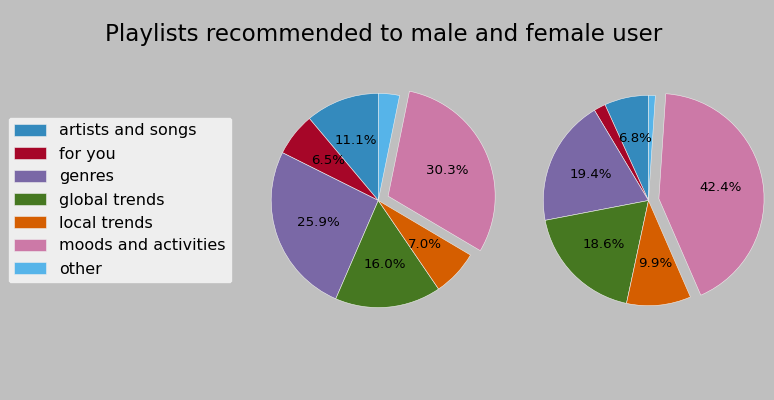

In [359]:
sizes_m = male.groupby('category')['category'].count().to_list()
sizes_f = female.groupby('category')['category'].count().to_list()
explode_m = [0.1 if m == max(sizes_m) else 0 for m in sizes_m]
explode_f = [0.1 if m == max(sizes_f) else 0 for m in sizes_f]
plt.style.use('bmh')

#plt.figure(dpi=1200)

fig1, (ax1, ax2) = plt.subplots(1,2)
ax1.set_title('Playlists recommended to male and female user', loc='center', pad=-30, size='xx-large')

wedges, texts, autotexts = ax1.pie(sizes_m, autopct=my_autopct2, startangle=90, textprops={'color':"black"}, explode=explode_m)
ax2.pie(sizes_f, autopct=my_autopct2, startangle=90, textprops={'color':"black"}, explode=explode_f)
ax1.axis('equal')
ax2.axis('equal')

leg = ax1.legend(wedges, list(male.groupby('category')['category'].count().keys()),
          loc="center left",
          bbox_to_anchor=(-1.2, 0, 100, 1), labelcolor='k')


plt.savefig('data/playlists.png', dpi=300, facecolor=ax1.get_facecolor(), bbox_inches="tight")
plt.show()

In [175]:
female[['playlist name', 'playlist count']][female['category'] == 'local trends'].drop_duplicates().sort_values(by='playlist count', ascending=False).head(20)

,playlist name,playlist count
3,top 50 netherlands,41
108,beste van nl,36
5,viral 50 netherlands,33
80,je moerstaal,33
1,top songs nederland,32
96,top songs netherlands,32
93,npo radio2 top 2000,31
694,viral hits nl,29
568,new music friday nl,28
92,hot hits nl,25


In [152]:
male[['playlist name', 'playlist count']][male['category'] == 'genres'].drop_duplicates().sort_values(by='playlist count', ascending=False).head()

,playlist name,playlist count
111,fresh pop,49
198,rock classics,38
119,soft pop hits,37
249,afro hits,34
166,360 dance,30


In [165]:
male[['playlist name', 'playlist count']][male['category'] == 'moods and activities'].drop_duplicates().sort_values(by='playlist count', ascending=False).head()

,playlist name,playlist count
10,t koffiehuis,51
58,chill hits,37
59,happy tunes,34
203,throwback party,32
76,songs to sing in the shower,31


In [164]:
female[['playlist name', 'playlist count']][female['category'] == 'genres'].drop_duplicates().sort_values(by='playlist count', ascending=False).head()

,playlist name,playlist count
178,fresh pop,59
8,rock classics,42
54,techno bunker,41
25,soft pop hits,34
402,pop sauce,34


In [166]:
female[['playlist name', 'playlist count']][female['category'] == 'moods and activities'].drop_duplicates().sort_values(by='playlist count', ascending=False).head()

,playlist name,playlist count
27,songs to sing in the shower,89
19,lofi beats,72
18,peaceful piano,65
84,instrumental study,54
51,summer 22,49


In [176]:
male[['playlist name', 'playlist count']][male['category'] == 'moods and activities'].drop_duplicates().sort_values(by='playlist count', ascending=False).head()

,playlist name,playlist count
10,t koffiehuis,51
58,chill hits,37
59,happy tunes,34
203,throwback party,32
76,songs to sing in the shower,31


In [316]:
l = ['peaceful piano',
 'lofi beats',
 'intense studying',
 'instrumental study',
 'maximum concentration',
 'homework motivation',
 'reading soundtrack',
 'homework vibes',
 'piano in the background']

In [323]:
concentration = female[['playlist name', 'playlist count']][female['playlist name'].isin(l)].drop_duplicates()

concentration['playlist count'].sum()

295

In [366]:
#x = 
x = female[['playlist name', 'playlist count','category']][female['category'] == 'moods and activities'].drop_duplicates()
x.sort_values(by='playlist count', ascending=False).head(20)

,playlist name,playlist count,category
27,songs to sing in the shower,89,moods and activities
19,lofi beats,72,moods and activities
18,peaceful piano,65,moods and activities
84,instrumental study,54,moods and activities
51,summer 22,49,moods and activities
21,vibes,48,moods and activities
17,t koffiehuis,45,moods and activities
20,easy 80s,45,moods and activities
70,life sucks,42,moods and activities
172,cardio,38,moods and activities


In [337]:
# How much percent of all mood and activity playlists are concentration playlists
(295/1605)*100

18.38006230529595

In [319]:
male[['playlist name', 'playlist count']][male['playlist name'].isin(l)].drop_duplicates()

,playlist name,playlist count
60,peaceful piano,11
62,lofi beats,11
123,maximum concentration,1
124,instrumental study,1
129,intense studying,1
130,reading soundtrack,1
2470,homework vibes,9


In [163]:
x = male[['playlist name', 'playlist count']].drop_duplicates()
((37+49)/sum(x['playlist count']))*100

2.519777322004102

In [80]:
# Female amount of different playlists
for v in values:
    print(v,'\t',len(female['playlist name'][female['category'] == v].drop_duplicates()))
print('Total: \t', len(female['playlist name'].unique()))

global trends 	 26
local trends 	 16
genres 	 54
moods and activities 	 85
artists and songs 	 44
for you 	 9
other 	 4
Total: 	 238


In [81]:
for v in values:
    print(v,'\t',len(male['playlist name'][male['category'] == v].drop_duplicates()))
print('Total: \t', len(male['playlist name'].unique()))

global trends 	 29
local trends 	 26
genres 	 84
moods and activities 	 119
artists and songs 	 64
for you 	 10
other 	 15
Total: 	 347


In [84]:
(347/238)*100

119 - 85

34

In [79]:
# TODO: Rename plot to the variable used above to create plots

plt.style.use('Solarize_Light2')

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
sizes = list(plot.values())

fig1, ax1 = plt.subplots()
ax1.set_title('Hubs recommended to the male account', loc='right')
wedges, texts, autotexts = ax1.pie(sizes, autopct='%1.1f%%', startangle=90, textprops={'color':"black"}) #explode=explode
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

leg = ax1.legend(wedges, labels,
          loc="center left",
          bbox_to_anchor=(0.8, 0, 0, 1), labelcolor='k')


plt.savefig('data/male_hub.png', dpi=300, facecolor=ax1.get_facecolor(), bbox_inches="tight")
plt.show()

NameError: name 'plot' is not defined

In [ ]:
plt.style.use('Solarize_Light2')

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['moods and activities', 'genres', 'for you', 'trends', 'more like other artists', 'recommended', 'more like other playlists']#list(plot.keys())
sizes = list(plot.values())

fig1, ax1 = plt.subplots()
ax1.set_title('Hubs recommended to the female account', loc='center')
wedges, texts, autotexts = ax1.pie(sizes, autopct='%1.1f%%', startangle=90, textprops={'color':"black"}) #explode=explode
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

leg = ax1.legend(wedges, labels,
          loc="center left",
          bbox_to_anchor=(0.8, 0, 0, 1), labelcolor='k')

plt.savefig('data/female_hub.png', dpi=300, facecolor=ax1.get_facecolor(), bbox_inches="tight")
plt.show()

NameError: name 'plot' is not defined

# Timeleness of playlists

In [ ]:
nights = female.copy()
nights['time'] = female['time'].astype(str).apply(lambda x: int(x[:2]))
for i, time in nights.time.iteritems():
    if time < 12:
        nights.iloc[i] = 'morning'
    elif time >=12<19:
        nights.iloc[i] = 'afternoon'
    else:
        nights.iloc[i] = 'evening'

#nights = female.replace({'time':t})
#nights = female[female['time'] < 21 > 18]
nights[nights['hub name']].drop_duplicates()